<a href="https://colab.research.google.com/github/namanphy/EVA5/blob/main/S9/quiz9_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datetime import datetime 
print("Current Date/Time: ", datetime.now())

SyntaxError: ignored

## Setting up code

#### Cloning the required [repository](https://github.com/namanphy/EVA5/) and adding the path to the code directory.

In [ ]:
import sys

! git clone https://github.com/namanphy/EVA5.git
! pip install git+https://github.com/albumentations-team/albumentations.git
sys.path.append('EVA5/S9/')

#### Importing the required modules and files

In [3]:
import cuda
from data.dataset import CIFAR10
from data.dataloader import data_loader
from model.QuizDNN import QuizDNN, model_summary
from model.functions import sgd_optimizer, cross_entropy_loss
from model.trainer import Trainer
from utils import set_seed, plot_metric
# from gradcam.gradcam import plot_gradcam

In [4]:
set_seed(123)
use_cuda = cuda.cuda_is_available()
device = cuda.enable_cuda()

## Making the data ready

In [9]:
cifar10 = CIFAR10(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5), rotation=0, horizontal_flip=0.5, cutout=0.0, cutout_hw_ratio=2)

train_set = cifar10.download('../data', train=True, apply_transform=True)
test_set = cifar10.download('../data', train=False, apply_transform=True)

train_loader = data_loader(train_set, 64, use_cuda, num_workers=4)
test_loader = data_loader(test_set, 64, use_cuda, num_workers=4)

Files already downloaded and verified
Transforms :  {'train': True, 'mean': (0.5, 0.5, 0.5), 'std': (0.5, 0.5, 0.5), 'rotation': 0, 'horizontal_flip': 0.5, 'cutout': 0.0, 'cutout_height': 16, 'cutout_width': 16}
Files already downloaded and verified
Transforms :  {'train': False, 'mean': (0.5, 0.5, 0.5), 'std': (0.5, 0.5, 0.5), 'rotation': 0, 'horizontal_flip': 0.5, 'cutout': 0.0, 'cutout_height': 16, 'cutout_width': 16}
Files already downloaded and verified


#### Printing the shape of one image

In [10]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
print('shape of one image - ', images[0].shape)

shape of one image -  torch.Size([3, 32, 32])


## Import model architecture and set up training

#### model setup

In [11]:
model = QuizDNN()
model_summary(model.to(device), input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4           [-1, 64, 32, 32]          36,864
       BatchNorm2d-5           [-1, 64, 32, 32]             128
              ReLU-6           [-1, 64, 32, 32]               0
            Conv2d-7           [-1, 64, 32, 32]          36,864
       BatchNorm2d-8           [-1, 64, 32, 32]             128
              ReLU-9           [-1, 64, 32, 32]               0
        MaxPool2d-10           [-1, 64, 16, 16]               0
           Conv2d-11           [-1, 64, 16, 16]          36,864
      BatchNorm2d-12           [-1, 64, 16, 16]             128
             ReLU-13           [-1, 64, 16, 16]               0
           Conv2d-14           [-1, 64,

EVA5/S9/model/QuizDNN.py:109: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)


#### Training model

In [12]:
results = {}  # empty dict to store results

criterion = cross_entropy_loss()
optimizer = sgd_optimizer(model, lr=0.01, l2_factor=0)

trainer = Trainer(model, optimizer, criterion, train_loader, valid_data_loader=test_loader, lr_scheduler=None, l1_loss=False)

results['quiz_dnn'] = trainer.train(20)
trainer.save('quiz_dnn_model')

  0%|          | 0/782 [00:00<?, ?it/s]

------------ EPOCH 1 -------------


EVA5/S9/model/QuizDNN.py:109: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)
Loss=0.7566267251968384 Batch_id=781 Accuracy=52.54: 100%|██████████| 782/782 [00:24<00:00, 31.74it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 2.0952, Accuracy: 3704/10000 (37%)

------------ EPOCH 2 -------------


Loss=0.8921689391136169 Batch_id=781 Accuracy=68.26: 100%|██████████| 782/782 [00:24<00:00, 31.49it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.1343, Accuracy: 5907/10000 (59%)

------------ EPOCH 3 -------------


Loss=0.5391478538513184 Batch_id=781 Accuracy=74.53: 100%|██████████| 782/782 [00:24<00:00, 31.84it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.2374, Accuracy: 6074/10000 (61%)

------------ EPOCH 4 -------------


Loss=0.8643436431884766 Batch_id=781 Accuracy=78.14: 100%|██████████| 782/782 [00:24<00:00, 31.58it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.3576, Accuracy: 6140/10000 (61%)

------------ EPOCH 5 -------------


Loss=0.5110535621643066 Batch_id=781 Accuracy=80.84: 100%|██████████| 782/782 [00:24<00:00, 31.32it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.2929, Accuracy: 6075/10000 (61%)

------------ EPOCH 6 -------------


Loss=0.3641210198402405 Batch_id=781 Accuracy=82.83: 100%|██████████| 782/782 [00:24<00:00, 31.63it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.0762, Accuracy: 6761/10000 (68%)

------------ EPOCH 7 -------------


Loss=0.21143877506256104 Batch_id=781 Accuracy=84.41: 100%|██████████| 782/782 [00:24<00:00, 31.40it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.0218, Accuracy: 6906/10000 (69%)

------------ EPOCH 8 -------------


Loss=0.4693424701690674 Batch_id=781 Accuracy=85.78: 100%|██████████| 782/782 [00:24<00:00, 31.54it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.0471, Accuracy: 7011/10000 (70%)

------------ EPOCH 9 -------------


Loss=0.4609241187572479 Batch_id=781 Accuracy=86.65: 100%|██████████| 782/782 [00:24<00:00, 31.37it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.9339, Accuracy: 7230/10000 (72%)

------------ EPOCH 10 -------------


Loss=0.2743183374404907 Batch_id=781 Accuracy=87.66: 100%|██████████| 782/782 [00:24<00:00, 31.57it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6828, Accuracy: 7851/10000 (79%)

------------ EPOCH 11 -------------


Loss=0.415321409702301 Batch_id=781 Accuracy=88.42: 100%|██████████| 782/782 [00:24<00:00, 31.44it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.1080, Accuracy: 7031/10000 (70%)

------------ EPOCH 12 -------------


Loss=0.37053942680358887 Batch_id=781 Accuracy=89.32: 100%|██████████| 782/782 [00:24<00:00, 31.50it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.6194, Accuracy: 8026/10000 (80%)

------------ EPOCH 13 -------------


Loss=0.20224256813526154 Batch_id=781 Accuracy=90.07: 100%|██████████| 782/782 [00:24<00:00, 31.58it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.7160, Accuracy: 7850/10000 (78%)

------------ EPOCH 14 -------------


Loss=0.20728692412376404 Batch_id=781 Accuracy=90.59: 100%|██████████| 782/782 [00:24<00:00, 31.51it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.0282, Accuracy: 7206/10000 (72%)

------------ EPOCH 15 -------------


Loss=0.3595733344554901 Batch_id=781 Accuracy=91.20: 100%|██████████| 782/782 [00:24<00:00, 31.78it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.2017, Accuracy: 7056/10000 (71%)

------------ EPOCH 16 -------------


Loss=0.5205880403518677 Batch_id=781 Accuracy=91.84: 100%|██████████| 782/782 [00:24<00:00, 31.72it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.9502, Accuracy: 7397/10000 (74%)

------------ EPOCH 17 -------------


Loss=0.6058682203292847 Batch_id=781 Accuracy=92.19: 100%|██████████| 782/782 [00:24<00:00, 31.62it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 2.2109, Accuracy: 5532/10000 (55%)

------------ EPOCH 18 -------------


Loss=0.3803251087665558 Batch_id=781 Accuracy=92.77: 100%|██████████| 782/782 [00:24<00:00, 31.67it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 0.9559, Accuracy: 7567/10000 (76%)

------------ EPOCH 19 -------------


Loss=0.17536497116088867 Batch_id=781 Accuracy=93.16: 100%|██████████| 782/782 [00:24<00:00, 31.55it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Test set: Average loss: 1.1727, Accuracy: 7035/10000 (70%)

------------ EPOCH 20 -------------


Loss=0.21041549742221832 Batch_id=781 Accuracy=93.72: 100%|██████████| 782/782 [00:24<00:00, 31.58it/s]



Test set: Average loss: 1.2310, Accuracy: 6877/10000 (69%)



## Analyzing results 

In [16]:
from statistics import mean
print('Train accuracy - ',  max(results['quiz_dnn']['train_acc']))
print('Test accuracy - ',  max(results['quiz_dnn']['test_acc']))

Train accuracy -  93.716
Test accuracy -  80.26


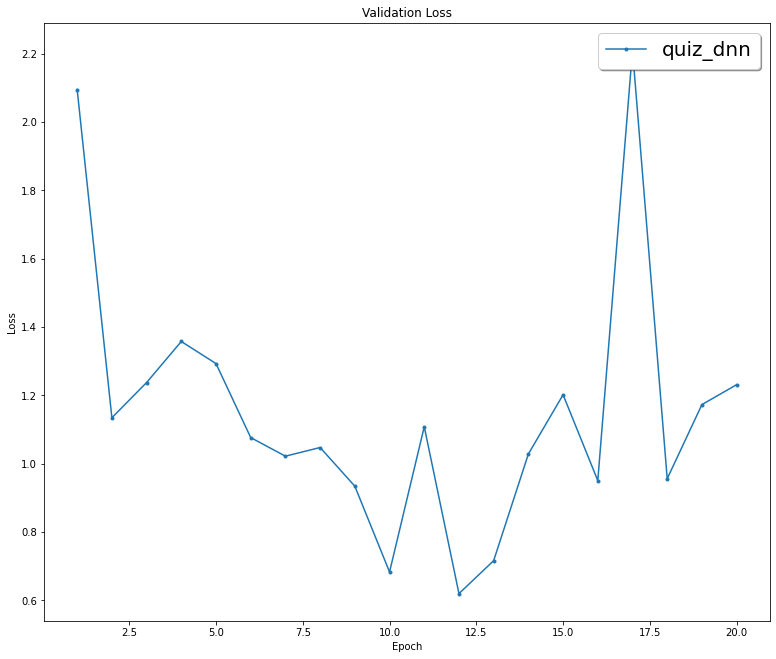

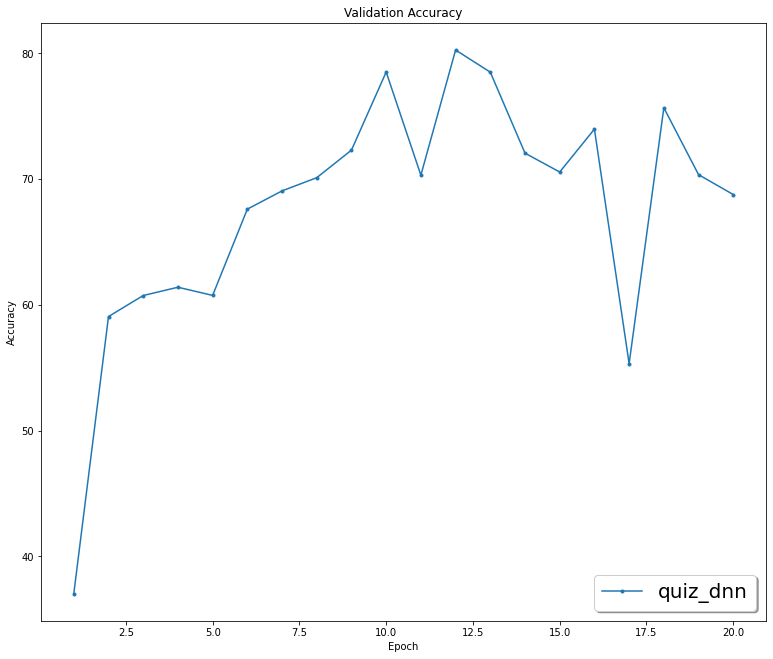

In [17]:
# Validation loss
losses = {}
accuracies = {}
for k, v in results.items():
    losses[k] = v['test_loss']
    accuracies[k] = v['test_acc']
  
plot_metric(losses, 'Loss')
plot_metric(accuracies, 'Accuracy')